#**ACERCA DEL DESAFÍO**

##**Telecom X - Análisis de Evasión de Clientes**
Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será **recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa**. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

¿Qué vas a practicar?
*   ✅Importar y manipular datos desde una API de manera eficiente.

*   ✅ Aplicar los conceptos de ETL (Extracción, Transformación y Carga) en la preparación de los datos.
*   ✅ Crear visualizaciones estratégicas para identificar patrones y tendencias.
*   ✅ Realizar un Análisis Exploratorio de Datos (EDA) y generar un informe con insights relevantes.



#**EXTRACCIÓN DE DATOS**


¿Qué debes hacer?
*   Cargar los datos directamente desde la API
*   Convertir los datos en un dataframe de Pandas para facilitar la manipulación.

Enlances:

https://github.com/ingridcristh/challenge2-data-science-LATAM

https://github.com/ingridcristh/challenge2-data-science-LATAM/blob/main/TelecomX_Data.json


In [4]:
import pandas as pd
import requests
import json

In [5]:
customer_desertion = pd.json_normalize(pd.read_json('https://raw.githubusercontent.com/Ricardomasi/Challenge_Telecom_X_desertion_customers/refs/heads/main/TelecomX.json').
                             to_dict(orient='records'))

In [6]:
customer_desertion.head(5)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [7]:
#La tabla arriba solo me da una previsulización, no me aparece todas las columnas. Para ver todo vamos agregar los siguiente

pd.set_option('display.max_columns', None)

In [8]:
customer_desertion.head(5)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [9]:
customer_desertion.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [10]:
#Procedemos a renombrar las columnas para mejor comprensión

customer_desertion = customer_desertion.rename(columns= {
    'customerID': 'customer_id',
    'Churn': 'deserción',
    'customer.gender': 'genero',
    'customer.SeniorCitizen': 'adulto_mayor',
    'customer.Partner': 'tiene_pareja',
    'customer.Dependents': 'tiene_dependientes',
    'customer.tenure': 'antiguedad_del_cliente',
    'phone.PhoneService': 'servicio_telefonico',
    'phone.MultipleLines': 'multiples_lineas',
    'internet.InternetService': 'servicio_internet',
    'internet.OnlineSecurity': 'seguridad_online',
    'internet.OnlineBackup': 'respaldo_online',
    'internet.DeviceProtection': 'proteccion_dispositivos',
    'internet.TechSupport': 'soporte_tecnico',
    'internet.StreamingTV': 'streaming_tv',
    'internet.StreamingMovies': 'streaming_peliculas',
    'account.Contract': 'contrato',
    'account.PaperlessBilling': 'facturacion_electronica',
    'account.PaymentMethod': 'metodo_pago',
    'account.Charges.Monthly': 'cargo_mensuales',
    'account.Charges.Total': 'gastos_totales'
})

#**2. Conoce el conjunto de datos**

Ahora que has extraído los datos, es fundamental comprender la estructura del dataset y el significado de sus columnas. Esta etapa te ayudará a identificar qué variables son más relevantes para el análisis de evasión de clientes.

Para facilitar este proceso, hemos creado un diccionario de datos con la descripción de cada columna. Aunque no es obligatorio utilizarlo, puede ayudarte a comprender mejor la información disponible.

Enlaces:

*   https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html
*   https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html


#¿QUÉ DEBES HACER?

*   **Explorar las columnas del dataset y verificar sus tipos de datos.**
*   **Consultar el diccionario para comprender mejor el significado de las variables.**
*   **Identificar las columnas más relevantes para el análisis de deserción.**

In [11]:
#Primero vamos a revisar los nombres de las columnas que tenemos
customer_desertion.columns

Index(['customer_id', 'deserción', 'genero', 'adulto_mayor', 'tiene_pareja',
       'tiene_dependientes', 'antiguedad_del_cliente', 'servicio_telefonico',
       'multiples_lineas', 'servicio_internet', 'seguridad_online',
       'respaldo_online', 'proteccion_dispositivos', 'soporte_tecnico',
       'streaming_tv', 'streaming_peliculas', 'contrato',
       'facturacion_electronica', 'metodo_pago', 'cargo_mensuales',
       'gastos_totales'],
      dtype='object')

In [12]:
customer_desertion.head(5)

,customer_id,deserción,genero,adulto_mayor,tiene_pareja,tiene_dependientes,antiguedad_del_cliente,servicio_telefonico,multiples_lineas,servicio_internet,seguridad_online,respaldo_online,proteccion_dispositivos,soporte_tecnico,streaming_tv,streaming_peliculas,contrato,facturacion_electronica,metodo_pago,cargo_mensuales,gastos_totales
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [13]:
#para saber la cantidad de filas y columnas tenemos
customer_desertion.shape

(7267, 21)

In [14]:
#Para saber los tipos de datos que tenemos por columna
customer_desertion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              7267 non-null   object 
 1   deserción                7267 non-null   object 
 2   genero                   7267 non-null   object 
 3   adulto_mayor             7267 non-null   int64  
 4   tiene_pareja             7267 non-null   object 
 5   tiene_dependientes       7267 non-null   object 
 6   antiguedad_del_cliente   7267 non-null   int64  
 7   servicio_telefonico      7267 non-null   object 
 8   multiples_lineas         7267 non-null   object 
 9   servicio_internet        7267 non-null   object 
 10  seguridad_online         7267 non-null   object 
 11  respaldo_online          7267 non-null   object 
 12  proteccion_dispositivos  7267 non-null   object 
 13  soporte_tecnico          7267 non-null   object 
 14  streaming_tv            

In [15]:
#Para saber cuántos nulos existen, esto no elimina nada solo nos dice cuántos nulos hay
customer_desertion.isnull().sum()

,0
customer_id,0
deserción,0
genero,0
adulto_mayor,0
tiene_pareja,0
tiene_dependientes,0
antiguedad_del_cliente,0
servicio_telefonico,0
multiples_lineas,0
servicio_internet,0


In [16]:
#Detectamos que las columnas 'account.Charges.Total' y 'customer.SeniorCitizen' son númericas por tanto se transforma a númericas

customer_desertion['adulto_mayor'] = pd.to_numeric(customer_desertion['adulto_mayor'])

In [17]:
customer_desertion['gastos_totales'] = pd.to_numeric(customer_desertion['gastos_totales'], errors='coerce')

In [18]:
#para verificar el tipo de datos aplicamos lo siguiente
customer_desertion.dtypes

,0
customer_id,object
deserción,object
genero,object
adulto_mayor,int64
tiene_pareja,object
tiene_dependientes,object
antiguedad_del_cliente,int64
servicio_telefonico,object
multiples_lineas,object
servicio_internet,object


#**3. Comprobación de inchoherencias en los datos**
##En este paso, verifica si hay problemas en los datos que puedan afectar el análisis. Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.

Enlaces:

*   https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.normalize.html
*   https://pandas.pydata.org/docs/reference/api/pandas.unique.html

In [19]:
#Esto me sirve para saber que tiene o contiene cada columna sobre su información
pd.unique(customer_desertion['deserción'])

array(['No', 'Yes', ''], dtype=object)

In [20]:
pd.unique(customer_desertion['adulto_mayor'])

array([0, 1])

In [21]:
pd.unique(customer_desertion['deserción'])

array(['No', 'Yes', ''], dtype=object)

In [22]:
#Ahora si queremos ver a nivel general aplicamos lo siguiente

for col in customer_desertion.columns:
  print(f'\n{col}')
  print(pd.unique(customer_desertion[col]))


customer_id
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

deserción
['No' 'Yes' '']

genero
['Female' 'Male']

adulto_mayor
[0 1]

tiene_pareja
['Yes' 'No']

tiene_dependientes
['Yes' 'No']

antiguedad_del_cliente
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

servicio_telefonico
['Yes' 'No']

multiples_lineas
['No' 'Yes' 'No phone service']

servicio_internet
['DSL' 'Fiber optic' 'No']

seguridad_online
['No' 'Yes' 'No internet service']

respaldo_online
['Yes' 'No' 'No internet service']

proteccion_dispositivos
['No' 'Yes' 'No internet service']

soporte_tecnico
['Yes' 'No' 'No internet service']

streaming_tv
['Yes' 'No' 'No internet service']

streaming_peliculas
['No' 'Yes' 'No internet service']

contrato
['One year' 'Month-to-month' 'Two year']

facturacion_elect

In [23]:
#Con esto indentificamos que la columna 'Churn' tiene valores vacios
customer_desertion['deserción'] = customer_desertion['deserción'].replace('', pd.NA)

In [24]:
#Verificamos cuantos registros quedaron en 'Churn'
customer_desertion['deserción'].isna().sum()

np.int64(224)

#**4. Manejo de Inconsistencias**

Ahora que has identificado las inconsistencias, es momento de aplicar las correcciones necesarias. Ajusta los datos para asegurarte de que estén completos y coherentes, preparándolos para las siguientes etapas del análisis.

In [25]:
#Vamos a identificar las columnas de cadena o 'strings' u 'object' que es lo mismo
cols_str = customer_desertion.select_dtypes(include='object').columns
cols_str

Index(['customer_id', 'deserción', 'genero', 'tiene_pareja',
       'tiene_dependientes', 'servicio_telefonico', 'multiples_lineas',
       'servicio_internet', 'seguridad_online', 'respaldo_online',
       'proteccion_dispositivos', 'soporte_tecnico', 'streaming_tv',
       'streaming_peliculas', 'contrato', 'facturacion_electronica',
       'metodo_pago'],
      dtype='object')

In [26]:
#Ahora vamos a normalizar las columnas de texto eliminando espacios y estandarizando valores

customer_desertion[cols_str] = customer_desertion[cols_str].apply(lambda col: col.str.lower().str.strip())

In [27]:
#Vemos que el texto de cada celda se ha normalizado
customer_desertion.head(5)

,customer_id,deserción,genero,adulto_mayor,tiene_pareja,tiene_dependientes,antiguedad_del_cliente,servicio_telefonico,multiples_lineas,servicio_internet,seguridad_online,respaldo_online,proteccion_dispositivos,soporte_tecnico,streaming_tv,streaming_peliculas,contrato,facturacion_electronica,metodo_pago,cargo_mensuales,gastos_totales
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,no,yes,no,yes,yes,no,one year,yes,mailed check,65.6,593.30
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,no,no,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,no,no,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,no,yes,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,no,no,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40


#**5. Columnas de cuentas diarias**

##Ahora que los datos están limpios, es momento de crear la columna "Cuentas_diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

Esta columna creada ayudará a profundizar el análisis y a obtener información valiosa para las siguientes etapas.

In [28]:
cuentas_diarias = customer_desertion['gastos_totales'] / 30

In [29]:
cuentas_diarias.head()

,gastos_totales
0,19.776667
1,18.080000
2,9.361667
3,41.261667
4,8.913333


In [30]:
#Comparamos el costo diario frente al 'Churn'

customer_desertion['cargo_diario'] = (
    customer_desertion['cargo_mensuales'] / 30
)

In [31]:
#Ahora si queremos ver a nivel general aplicamos lo siguiente

for col in customer_desertion.columns:
  print(f'\n{col}')
  print(pd.unique(customer_desertion[col]))


customer_id
['0002-orfbo' '0003-mknfe' '0004-tlhlj' ... '9992-ujoel' '9993-lhieb'
 '9995-hotoh']

deserción
['no' 'yes' <NA>]

genero
['female' 'male']

adulto_mayor
[0 1]

tiene_pareja
['yes' 'no']

tiene_dependientes
['yes' 'no']

antiguedad_del_cliente
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

servicio_telefonico
['yes' 'no']

multiples_lineas
['no' 'yes' 'no phone service']

servicio_internet
['dsl' 'fiber optic' 'no']

seguridad_online
['no' 'yes' 'no internet service']

respaldo_online
['yes' 'no' 'no internet service']

proteccion_dispositivos
['no' 'yes' 'no internet service']

soporte_tecnico
['yes' 'no' 'no internet service']

streaming_tv
['yes' 'no' 'no internet service']

streaming_peliculas
['no' 'yes' 'no internet service']

contrato
['one year' 'month-to-month' 'two year']

facturacion_ele

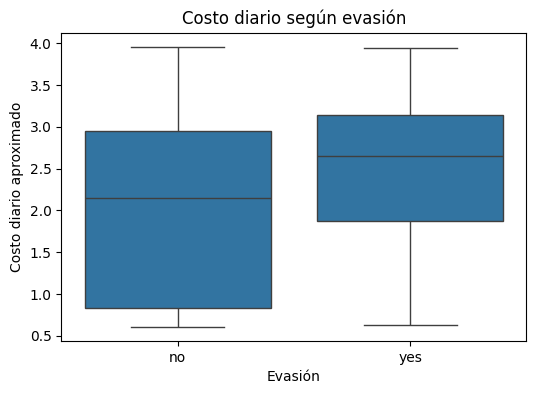

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.boxplot(
    data=customer_desertion,
    x='deserción',
    y='cargo_diario'
)
plt.title('Costo diario según evasión')
plt.ylabel('Costo diario aproximado')
plt.xlabel('Evasión')
plt.show()


In [33]:
#Descartamos que el ser adulto mayo sea determinante para la deserción. De hecho, nos dice que lás personas más jóvenes
#fueron las que desertaron
pd.crosstab(customer_desertion['deserción'], customer_desertion['adulto_mayor'])

adulto_mayor,0,1
deserción,,
no,4508,666
yes,1393,476


In [34]:
#Descartamos que el tener dependientes influya en la deserción
pd.crosstab(customer_desertion['deserción'], customer_desertion['tiene_dependientes'])

tiene_dependientes,no,yes
deserción,,
no,3390,1784
yes,1543,326


In [35]:
#Observamos que la variable antiguedad por cliente no pueda dar un indicio sobre la deserción
customer_desertion['antiguedad_del_cliente'].describe()

,antiguedad_del_cliente
count,7267.000000
mean,32.346498
std,24.571773
min,0.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


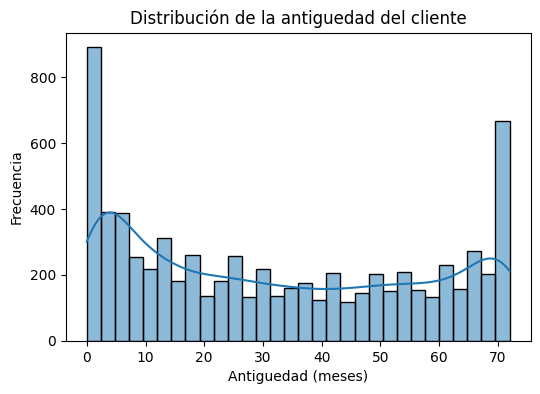

In [36]:
#Queremos conocer como se visualizar la antiguedad por cliente

plt.figure(figsize=(6,4))
sns.histplot(
    customer_desertion['antiguedad_del_cliente'],
    bins=30,
    kde=True
)

plt.title('Distribución de la antiguedad del cliente')
plt.xlabel('Antiguedad (meses)')
plt.ylabel('Frecuencia')
plt.show()


In [37]:
#El gráfico arriba nos dice que existe una concentración de clientes que tiene menos de 1 mes. Para saber o descartar la influencia
#del tiempo (antiguedad) sobre la desercción, vamos hacer un cruce con la columna deserción

customer_desertion[
    customer_desertion['antiguedad_del_cliente'] == 0
]['deserción'].value_counts(normalize=True) * 100

,proportion
deserción,
no,100.0


<Axes: xlabel='antiguedad_del_cliente', ylabel='Count'>

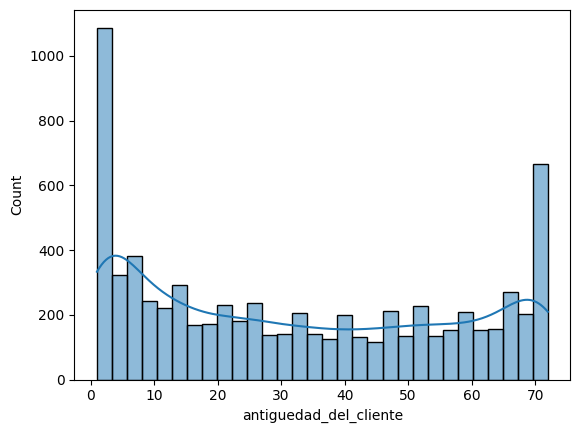

In [38]:
#Excluimos por el momento los ceros

sns.histplot(
    customer_desertion.loc[
        customer_desertion['antiguedad_del_cliente'] > 0,
        'antiguedad_del_cliente'
    ],
    bins=30,
    kde=True
)

In [39]:
#El gráfico arribar aún excpluyendo los ceros mantiene su concentración de evasión en el eje inicial.

In [40]:
#Para saber cuántos desertaron
desertores = customer_desertion[customer_desertion['deserción'] == 'yes']

In [41]:
#Contar cuántos desertaron por mes de antiguaedad
deserciones_por_mes = desertores.groupby('antiguedad_del_cliente').size().reset_index(name='cantidad_desertores')

In [42]:
deserciones_por_mes

,antiguedad_del_cliente,cantidad_desertores
0,1,380
1,2,123
2,3,94
3,4,83
4,5,64
...,...,...
67,68,9
68,69,8
69,70,11
70,71,6


In [43]:
deserciones_por_mes = (
    desertores.groupby('antiguedad_del_cliente')
    .size().reset_index(name='cantidad_desertores')
    .sort_values(by='cantidad_desertores', ascending=False)
)

In [44]:
deserciones_por_mes

,antiguedad_del_cliente,cantidad_desertores
0,1,380
1,2,123
2,3,94
3,4,83
4,5,64
...,...,...
59,60,6
71,72,6
61,62,5
63,64,4


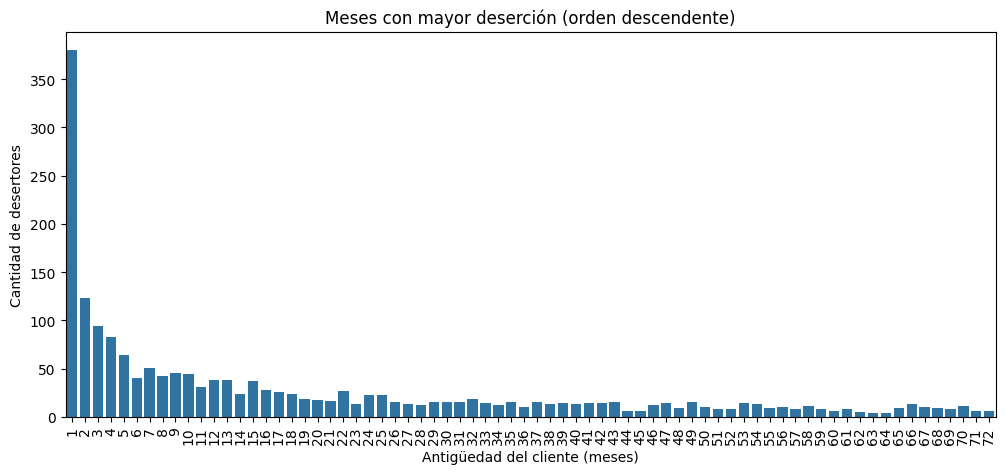

In [45]:
#Graficamos la información de la tabla
plt.figure(figsize=(12,5))

sns.barplot(
    data=deserciones_por_mes,
    x='antiguedad_del_cliente',
    y='cantidad_desertores'
)

plt.xlabel('Antigüedad del cliente (meses)')
plt.ylabel('Cantidad de desertores')
plt.title('Meses con mayor deserción (orden descendente)')

plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='antiguedad_del_cliente', ylabel='cantidad_desertores'>

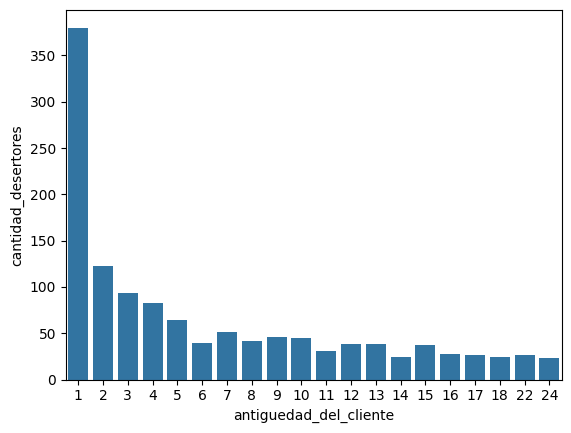

In [46]:
#Para visualizar la cantidad de desertores por top 10 o 20.
sns.barplot(
    data=deserciones_por_mes.head(20),
    x='antiguedad_del_cliente',
    y='cantidad_desertores'
)

In [47]:
#Vamos a crear un rango de antiguedad que va desde los cero mesese hasta los setenta y dos.

bins = list(range(0, 76, 5))
labels = [f'{i}-{i+4}' for i in bins[:-1]]

customer_desertion['rango_antiguedad'] = pd.cut(
    customer_desertion['antiguedad_del_cliente'],
    bins=bins,
    labels=labels,
    right=False
    )

In [48]:
#Clientes existentes en cada rango
cliente_por_rango = (
    customer_desertion.groupby('rango_antiguedad')
    .size()
    .reset_index(name='total_clientes')
)

/tmp/ipython-input-3285075584.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_desertion.groupby('rango_antiguedad')


In [49]:
cliente_por_rango

,rango_antiguedad,total_clientes
0,0-4,1283
1,5-9,644
2,10-14,532
3,15-19,440
4,20-24,411
5,25-29,374
6,30-34,349
7,35-39,324
8,40-44,325
9,45-49,343


In [50]:
#Cuántos desertan en cada rango
desertores = customer_desertion[customer_desertion['deserción'] == 'yes']

In [51]:
desertores['deserción'].count()

np.int64(1869)

In [52]:
#Agrupamos los dos calculos
deserciones_por_rango = (
    desertores
    .groupby('rango_antiguedad')
    .size()
    .reset_index(name='clientes_desertados')
)

/tmp/ipython-input-2622143861.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('rango_antiguedad')


In [53]:
analisis_rango = pd.merge(
    cliente_por_rango,
    deserciones_por_rango,
    on='rango_antiguedad',
    how='left'
)

In [54]:
#Calculo de la tasa de desercción
analisis_rango['tasa_desercion'] = (
    analisis_rango['clientes_desertados'] / analisis_rango['total_clientes']
) * 100

In [55]:
analisis_rango

,rango_antiguedad,total_clientes,clientes_desertados,tasa_desercion
0,0-4,1283,680,53.000779
1,5-9,644,243,37.732919
2,10-14,532,176,33.082707
3,15-19,440,134,30.454545
4,20-24,411,98,23.844282
5,25-29,374,78,20.855615
6,30-34,349,77,22.063037
7,35-39,324,67,20.679012
8,40-44,325,62,19.076923
9,45-49,343,56,16.326531


In [56]:
#Unimos ambas tablas
comparacion_rango = pd.merge(
    cliente_por_rango,
    deserciones_por_rango,
    on='rango_antiguedad',
    how='left'
)
analisis_rango['clientes_desertados'] = analisis_rango['clientes_desertados'].fillna(0)

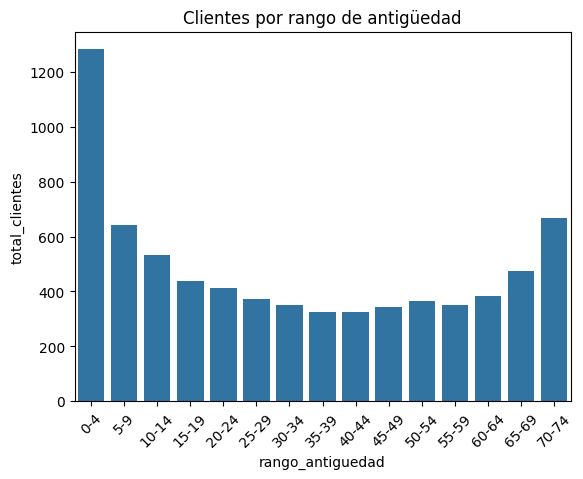

In [57]:
#Graficamos el cliente por rangos
sns.barplot(
    data=comparacion_rango,
    x='rango_antiguedad',
    y='total_clientes'
)
plt.xticks(rotation=45)
plt.title('Clientes por rango de antigüedad')
plt.show()

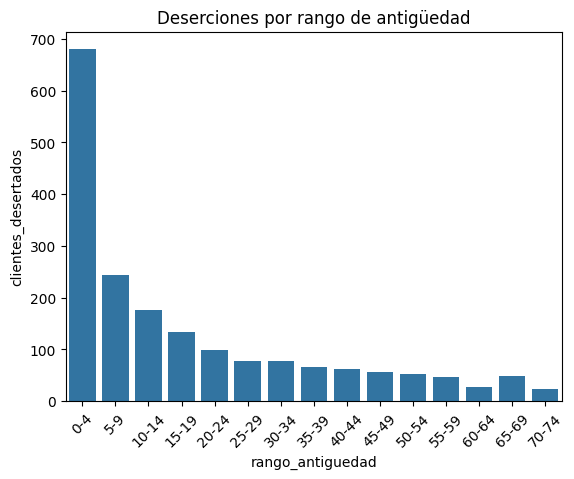

In [58]:
#Del gráfico anterior queremos saber cuántos desertores se registran por rango

sns.barplot(
    data=comparacion_rango,
    x='rango_antiguedad',
    y='clientes_desertados'
)
plt.xticks(rotation=45)
plt.title('Deserciones por rango de antigüedad')
plt.show()

In [59]:
#Creamos la columna de tasa de deserción en la variable 'comparacion_rango'
comparacion_rango['tasa_desercion'] = (
    comparacion_rango['clientes_desertados'] / comparacion_rango['total_clientes']
) * 100

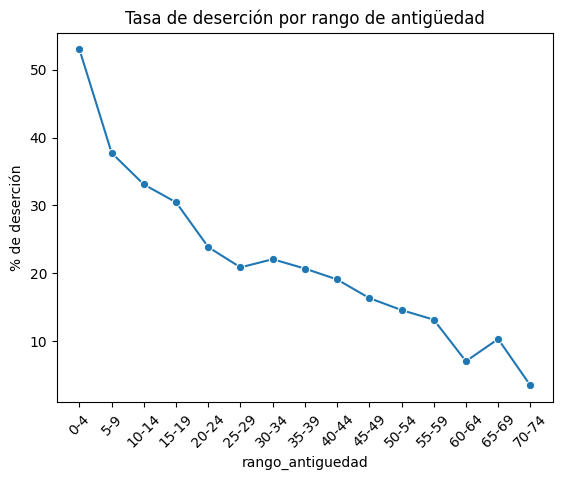

In [60]:
#Gráfico de la tasa de deserción
sns.lineplot(
    data=comparacion_rango,
    x='rango_antiguedad',
    y='tasa_desercion',
    marker='o'
)
plt.xticks(rotation=45)
plt.ylabel('% de deserción')
plt.title('Tasa de deserción por rango de antigüedad')
plt.show()

In [61]:
#Segmentamos los rangos por costos diarios

bins = [0, 1, 2, 3, 5, 10]
labels = ['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto']

customer_desertion['DailyCostSegment'] = pd.cut(
    customer_desertion['cargo_diario'],
    bins=bins,
    labels=labels
)

In [62]:
#Creamos una tabla
pd.crosstab(
    customer_desertion['DailyCostSegment'],
    customer_desertion['deserción'],
    normalize='index'
) * 100

deserción,no,yes
DailyCostSegment,,
Muy bajo,90.199637,9.800363
Bajo,74.071146,25.928854
Medio,66.093881,33.906119
Alto,67.222542,32.777458


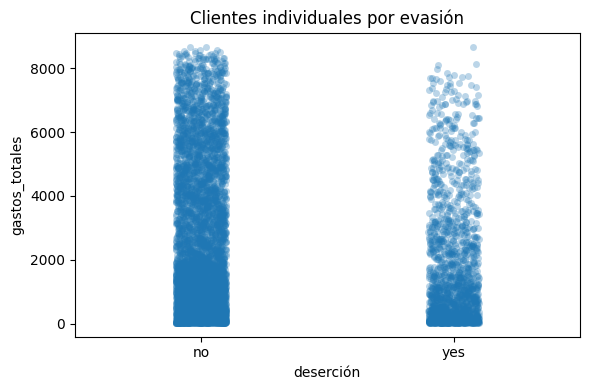

In [63]:
plt.figure(figsize=(6,4))
sns.stripplot(
    data=customer_desertion,
    x='deserción',
    y='gastos_totales',
    alpha=0.3
)
plt.title('Clientes individuales por evasión')
plt.tight_layout()
plt.show()

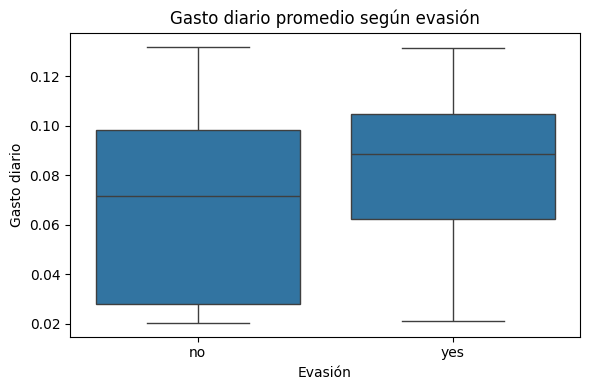

In [64]:
customer_desertion['cuentas_diarias'] = (
    customer_desertion['cargo_diario'] / 30
)

plt.figure(figsize=(6,4))
sns.boxplot(
    data=customer_desertion,
    x='deserción',
    y='cuentas_diarias'
)
plt.title('Gasto diario promedio según evasión')
plt.ylabel('Gasto diario')
plt.xlabel('Evasión')
plt.tight_layout()
plt.show()

#**Estandarización y transformación de datos** (OPCIONAL)

##La estandarización y transformación de datos es una etapa opcional, pero altamente recomendada, ya que busca hacer que la información sea más consistente, comprensible y adecuada para el análisis. Durante esta fase, por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

##Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos. Aunque no es un paso obligatorio, puede mejorar significativamente la claridad y comunicación de los resultados, facilitando la interpretación y evitando confusiones, especialmente al compartir información con stakeholders no técnicos.

#**ANÁLISIS DESCRIPTIVO**

Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

Documento:

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html


In [65]:
#Para saber datos estadisticos basicos de la columna contrato

customer_desertion['contrato'].describe()

,contrato
count,7267
unique,3
top,month-to-month
freq,4005


In [66]:
#Queremos saber las columnas que son numericas
num_cols = customer_desertion.select_dtypes(include=['int64', 'float64']).columns

In [67]:
num_cols

Index(['adulto_mayor', 'antiguedad_del_cliente', 'cargo_mensuales',
       'gastos_totales', 'cargo_diario', 'cuentas_diarias'],
      dtype='object')

In [68]:
#Aplicamos estadistica basica para ver el contenido de las columnas numericas

customer_desertion[num_cols].describe()

,adulto_mayor,antiguedad_del_cliente,cargo_mensuales,gastos_totales,cargo_diario,cuentas_diarias
count,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2280.634213,2.157337,0.071911
std,0.369074,24.571773,30.129572,2268.632997,1.004319,0.033477
min,0.000000,0.000000,18.250000,18.800000,0.608333,0.020278
25%,0.000000,9.000000,35.425000,400.225000,1.180833,0.039361
50%,0.000000,29.000000,70.300000,1391.000000,2.343333,0.078111
75%,0.000000,55.000000,89.875000,3785.300000,2.995833,0.099861
max,1.000000,72.000000,118.750000,8684.800000,3.958333,0.131944


In [69]:
#Ahora queremos saber la estadistica descriptiva de las columnas categoricas

customer_desertion.describe(include='object')

,customer_id,deserción,genero,tiene_pareja,tiene_dependientes,servicio_telefonico,multiples_lineas,servicio_internet,seguridad_online,respaldo_online,proteccion_dispositivos,soporte_tecnico,streaming_tv,streaming_peliculas,contrato,facturacion_electronica,metodo_pago
count,7267,7043,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267
unique,7267,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,9995-hotoh,no,male,no,no,yes,no,fiber optic,no,no,no,no,no,no,month-to-month,yes,electronic check
freq,1,5174,3675,3749,5086,6560,3495,3198,3608,3182,3195,3582,2896,2870,4005,4311,2445


In [70]:
#Vamos analizar la columna que es nuestra variable exogena

customer_desertion['deserción'].value_counts()

,count
deserción,
no,5174
yes,1869


In [71]:
customer_desertion['deserción'].describe()

,deserción
count,7043
unique,2
top,no
freq,5174


#**6. Distribución de la deserción (evasión)**

##En este paso el objetivo es comprender cómo está distribuida la variable **Chur n** (EVASIÓN) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

In [72]:
#Creamos una tabla con la distribucion porcentual
customer_desertion['deserción'].value_counts(normalize=True) * 100

,proportion
deserción,
no,73.463013
yes,26.536987


In [73]:
#Para graficar usamos la libreria 'matplotlib'

import matplotlib.pyplot as plt

In [74]:
desertion = customer_desertion['deserción'].value_counts()

In [75]:
desertion

,count
deserción,
no,5174
yes,1869


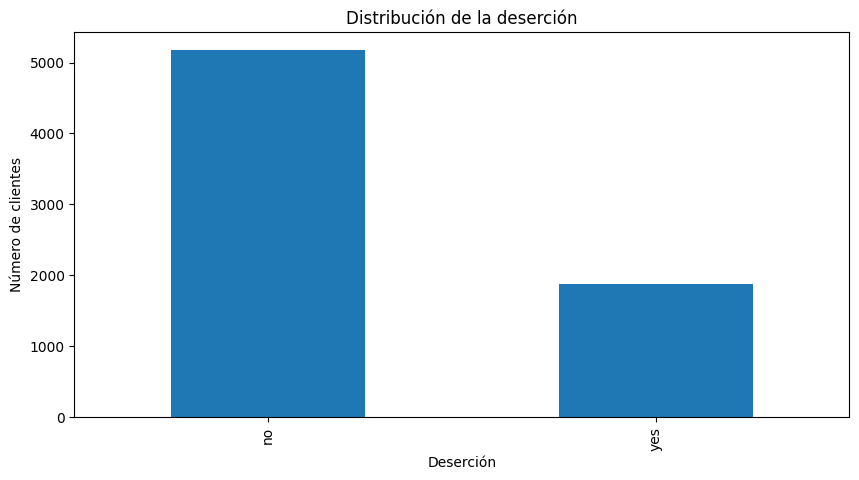

In [76]:
#Antes de grafica con matplolib debemos estructura cada parte del grafico

plt.figure(figsize=(10, 5))
desertion.plot(kind='bar')
plt.title('Distribución de la deserción')
plt.xlabel('Deserción')
plt.ylabel('Número de clientes')
plt.show()

In [77]:
import plotly.express as px

#Graficamos con plotly
#Create desercion_df from the 'desertion' Series, which contains the value counts
desercion_df = desertion.reset_index()
# Rename the columns to match the plot's requirements
desercion_df.columns = ['Deserción', 'Número de clientes']

fig = px.bar(
    data_frame = desercion_df,
    x = 'Deserción',
    y = 'Número de clientes',
    text = 'Número de clientes',
    title = 'Distribución de la deserción'
)

fig.update_traces(textposition='outside') # Corrected typo: textpsition -> textposition
fig.update_layout(yaxis_title = 'Numero de clientes', xaxis_title = 'Desercion')
fig.show()

In [78]:
#Vamos hacer un analisis cruzado

desertion_gender = pd.crosstab(
    customer_desertion['deserción'],
    customer_desertion['genero']
)

In [79]:
desertion_gender

genero,female,male
deserción,,
no,2549,2625
yes,939,930


<Figure size 1000x500 with 0 Axes>

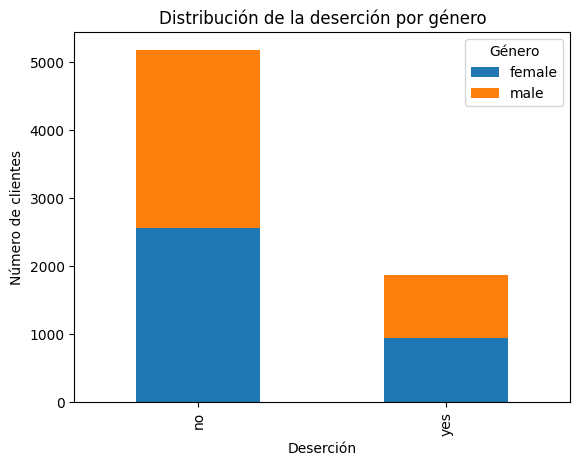

In [80]:
#Graficamos la informacion de desercion por genero

plt.figure(figsize=(10, 5))
desertion_gender.plot(kind='bar', stacked=True)
plt.title('Distribución de la deserción por género')
plt.xlabel('Deserción')
plt.ylabel('Número de clientes')
plt.legend(title='Género')
plt.show()

In [81]:
desertion_gender_df = desertion_gender.reset_index()

desertion_gender_long = desertion_gender_df.melt(
    id_vars='deserción',
    var_name='genero',
    value_name='Número de clientes'
)

In [82]:
import plotly.express as px # Ensure plotly.express is available

# desertion_gender_df is correctly created as the wide format DataFrame
desertion_gender_df = desertion_gender.reset_index()

# Correct the melt function call
# The 'x', 'y', 'color', 'text', 'title' are not arguments for pandas.DataFrame.melt
# They are arguments for plotting functions like plotly.express.bar.
melted_df = desertion_gender_df.melt(
    id_vars=['deserción'],          # Column(s) to use as identifier variables
    value_vars=['female', 'male'],  # Columns to unpivot
    var_name='genero',              # Name for the new column holding the unpivoted column names
    value_name='Número de clientes' # Name for the new column holding the values
)

# Now use the correctly melted DataFrame for plotting
fig = px.bar(
    data_frame = melted_df, # Use the melted DataFrame here
    x = 'deserción',
    y = 'Número de clientes',
    color = 'genero',
    text = 'Número de clientes', # Add text for values on bars
    title = 'Distribución de la deserción por género'
)

fig.update_traces(textposition='outside')
fig.update_layout(
    barmode = 'stack',
    yaxis_title = 'Número de clientes',
    xaxis_title = 'Deserción',
    legend_title = 'Género'
)
fig.show() # Make sure to show the figure

#**7. Recuento de evasión por variables categóricas**

##Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como

*   género,
*   tipo de contrato,
*   método de pago,
*   entre otras.

##Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

In [83]:
tipo_contrato = customer_desertion['contrato'].value_counts()

In [84]:
metodo_pago = customer_desertion['metodo_pago'].value_counts()

In [85]:
servicio = customer_desertion['streaming_tv'].value_counts()

In [86]:
servicio_a = customer_desertion['streaming_peliculas'].value_counts()

In [87]:
df_desertion = desertion.reset_index() #agregamos a la tabla un indice
df_desertion.columns = ['Categoria', 'Total']
df_desertion['Variable'] = 'Evasión'

In [88]:
df_desertion

,Categoria,Total,Variable
0,no,5174,Evasión
1,yes,1869,Evasión


In [89]:
df_tipo_contrato = tipo_contrato.reset_index()
df_tipo_contrato.columns = ['Categoria', 'Total']
df_tipo_contrato['Variable'] = 'Tipo de contrato'

In [90]:
df_tipo_contrato

,Categoria,Total,Variable
0,month-to-month,4005,Tipo de contrato
1,two year,1743,Tipo de contrato
2,one year,1519,Tipo de contrato


In [91]:
df_metodo_pago = metodo_pago.reset_index()
df_metodo_pago.columns = ['Categoria', 'Total']
df_metodo_pago['Variable'] = 'Metodo de pago'

In [92]:
df_metodo_pago

,Categoria,Total,Variable
0,electronic check,2445,Metodo de pago
1,mailed check,1665,Metodo de pago
2,bank transfer (automatic),1589,Metodo de pago
3,credit card (automatic),1568,Metodo de pago


In [93]:
df_servicio = servicio.reset_index()
df_servicio.columns = ['Categoria', 'Total']
df_servicio['Variable'] = 'Streaming TV'

In [94]:
df_servicio

,Categoria,Total,Variable
0,no,2896,Streaming TV
1,yes,2790,Streaming TV
2,no internet service,1581,Streaming TV


In [95]:
df_servicio_a = servicio_a.reset_index()
df_servicio_a.columns = ['Categoria', 'Total']
df_servicio_a['Variable'] = 'Streaming Movies'

In [96]:
df_servicio_a

,Categoria,Total,Variable
0,no,2870,Streaming Movies
1,yes,2816,Streaming Movies
2,no internet service,1581,Streaming Movies


In [97]:
#Para tener un panorama general y no indivudual, unimos las tablas

tablas_unificadas_churn = pd.concat(
    [
        df_desertion,
        df_tipo_contrato,
        df_metodo_pago,
        df_servicio,
        df_servicio_a
    ],
    ignore_index=True
)

In [98]:
tablas_unificadas_churn

,Categoria,Total,Variable
0,no,5174,Evasión
1,yes,1869,Evasión
2,month-to-month,4005,Tipo de contrato
3,two year,1743,Tipo de contrato
4,one year,1519,Tipo de contrato
5,electronic check,2445,Metodo de pago
6,mailed check,1665,Metodo de pago
7,bank transfer (automatic),1589,Metodo de pago
8,credit card (automatic),1568,Metodo de pago
9,no,2896,Streaming TV


In [99]:
#Ahora queremos hacerlo dinamico

tablas_unificadas_churn.groupby('Variable')['Total'].sum()

,Total
Variable,
Evasión,7043
Metodo de pago,7267
Streaming Movies,7267
Streaming TV,7267
Tipo de contrato,7267


In [100]:
#Queremos saber los porcentajes
tablas_unificadas_churn['Porcentaje'] = (tablas_unificadas_churn.groupby('Variable')['Total'].transform(lambda x:x/x.sum()*100))

In [101]:
tablas_unificadas_churn.sort_values(['Variable', 'Porcentaje'], ascending=[True, False])

,Categoria,Total,Variable,Porcentaje
0,no,5174,Evasión,73.463013
1,yes,1869,Evasión,26.536987
5,electronic check,2445,Metodo de pago,33.645246
6,mailed check,1665,Metodo de pago,22.911793
7,bank transfer (automatic),1589,Metodo de pago,21.865969
8,credit card (automatic),1568,Metodo de pago,21.576992
12,no,2870,Streaming Movies,39.493601
13,yes,2816,Streaming Movies,38.750516
14,no internet service,1581,Streaming Movies,21.755883
9,no,2896,Streaming TV,39.851383


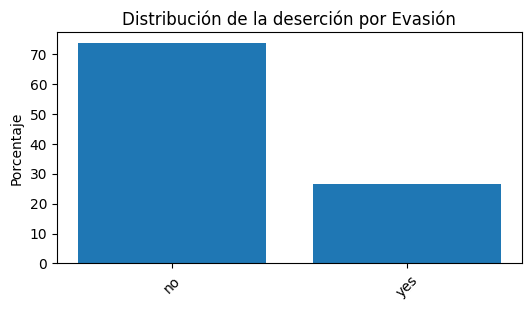

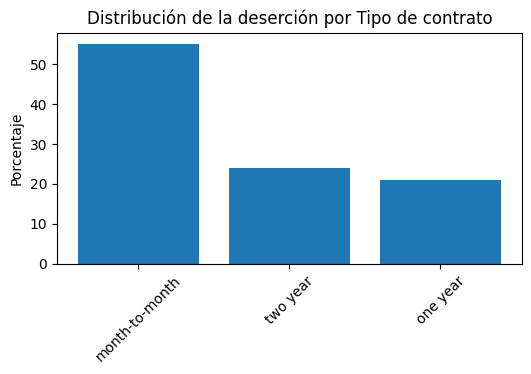

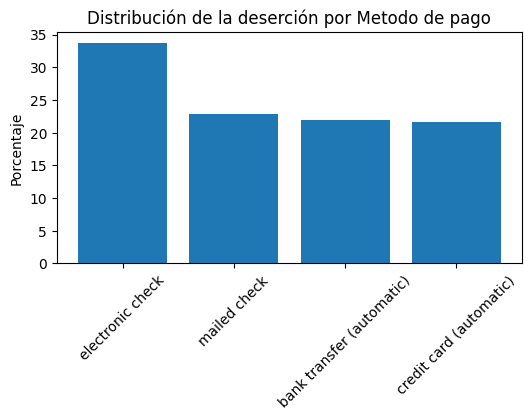

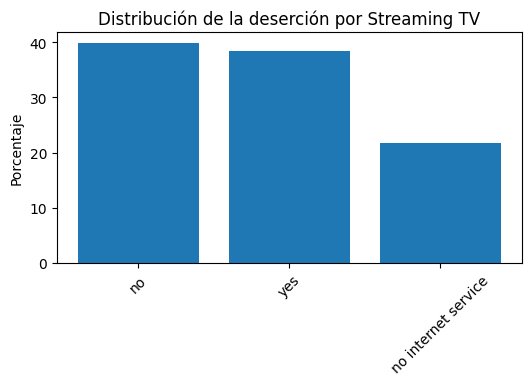

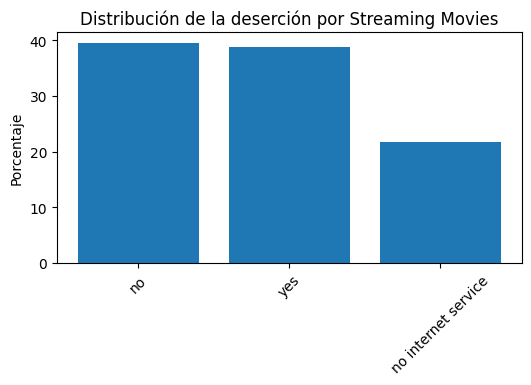

In [102]:
#Graficamos
for var in tablas_unificadas_churn['Variable'].unique():
  df_plot = tablas_unificadas_churn[tablas_unificadas_churn['Variable'] == var]

  plt.figure(figsize=(6, 3))
  plt.bar(df_plot['Categoria'], df_plot['Porcentaje'])
  plt.title(f'Distribución de la deserción por {var}')
  plt.ylabel('Porcentaje')
  plt.xticks(rotation=45)
  plt.show()

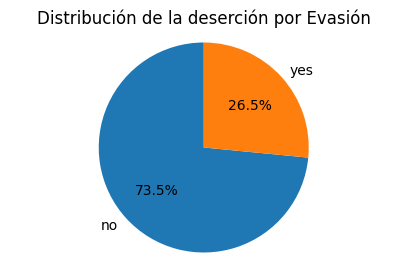

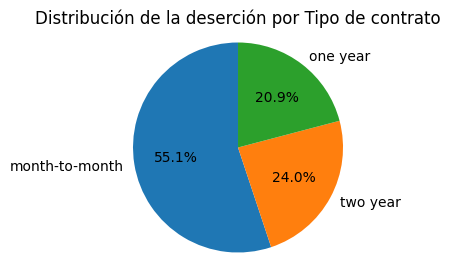

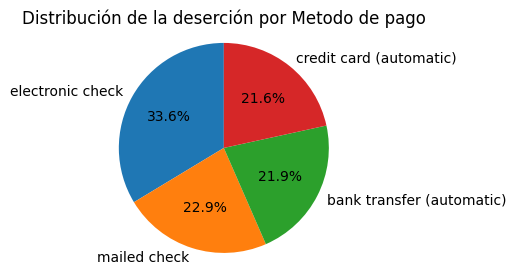

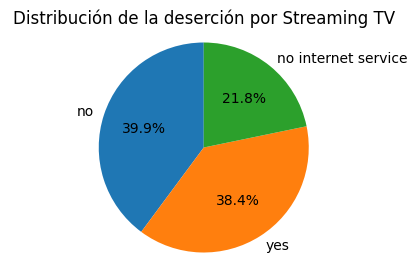

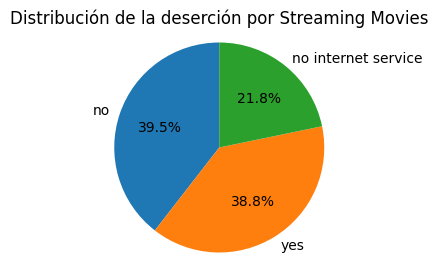

In [103]:
#grafico circular

for var in tablas_unificadas_churn['Variable'].unique():
  df_plot = tablas_unificadas_churn[tablas_unificadas_churn['Variable'] == var]

  plt.figure(figsize=(5, 3))
  plt.pie(df_plot['Total'], labels=df_plot['Categoria'], autopct='%1.1f%%', startangle=90)
  plt.title(f'Distribución de la deserción por {var}')
  plt.axis('equal')
  plt.show()

In [104]:
#Como vemos el grafico de pastel esta unido, vamos a usar otra libreria que nos ayude a visualizar mejor

import plotly.express as px

for var in tablas_unificadas_churn['Variable'].unique():
  df_plot = tablas_unificadas_churn[tablas_unificadas_churn['Variable'] == var]

  fig = px.pie(df_plot, values='Porcentaje', names='Categoria', title=f'Distribucion porcentual - {var}')

  fig.show()

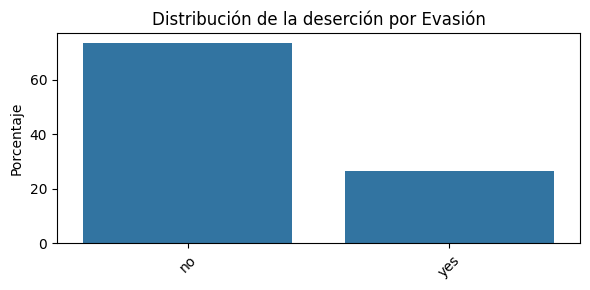

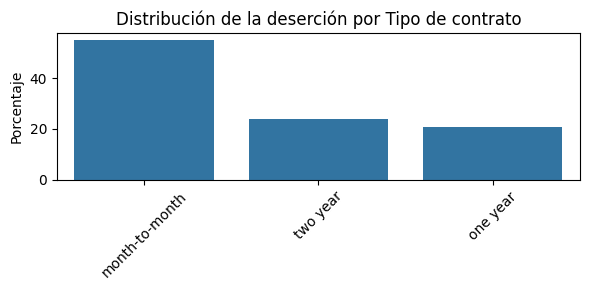

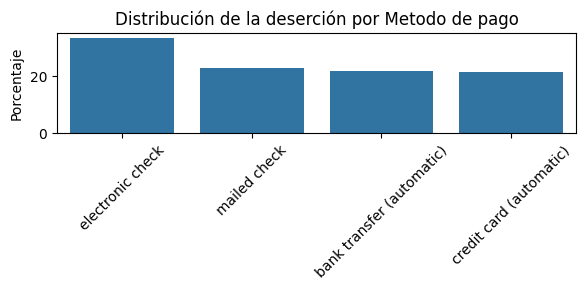

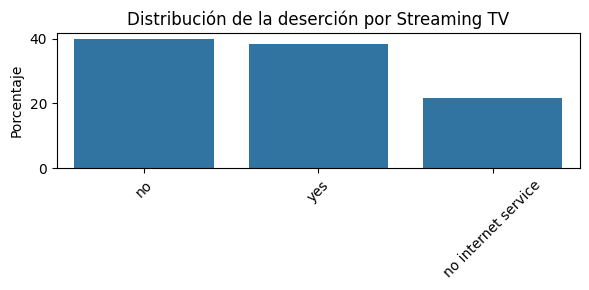

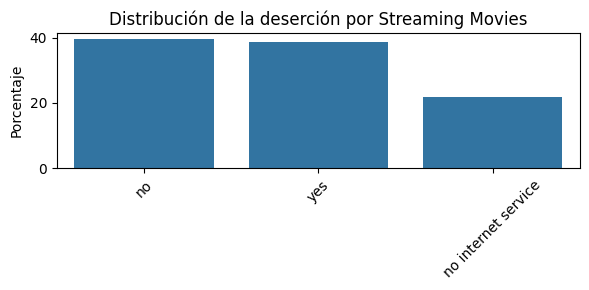

In [105]:
#Para ver el mismo grafico pero representado con barras

import seaborn as sns

for var in tablas_unificadas_churn['Variable'].unique():
  df_plot = tablas_unificadas_churn[tablas_unificadas_churn['Variable'] == var]

  plt.figure(figsize=(6, 3))
  sns.barplot(data=df_plot, x='Categoria', y='Porcentaje')
  plt.title(f'Distribución de la deserción por {var}')
  plt.xlabel('')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

#**8. Conteo de evasión por variables numéricas**

##En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

##Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

In [106]:
#Primero identificamos variables numericas
num_cols = customer_desertion.select_dtypes(include=['int64', 'float64']).columns

In [107]:
num_cols

Index(['adulto_mayor', 'antiguedad_del_cliente', 'cargo_mensuales',
       'gastos_totales', 'cargo_diario', 'cuentas_diarias'],
      dtype='object')

In [108]:
customer_desertion['adulto_mayor'].head(5)

,adulto_mayor
0,0
1,0
2,0
3,1
4,1


In [109]:
cols_nums = [
    'tiene_dependientes',
    'cargo_mensuales',
    'gastos_totales'
]

In [110]:
customer_desertion[cols_nums].describe()

,cargo_mensuales,gastos_totales
count,7267.000000,7256.000000
mean,64.720098,2280.634213
std,30.129572,2268.632997
min,18.250000,18.800000
25%,35.425000,400.225000
50%,70.300000,1391.000000
75%,89.875000,3785.300000
max,118.750000,8684.800000


In [111]:
#Estilizamos la tabla
customer_desertion[cols_nums].describe().style.format({
    'account.Charges.Monthly': '{:,.2f}',
    'account.Charges.Total': '{:,.2f}',
    'customer.tenure': '{:,.2f}'
})


,cargo_mensuales,gastos_totales
count,7267.000000,7256.000000
mean,64.720098,2280.634213
std,30.129572,2268.632997
min,18.250000,18.800000
25%,35.425000,400.225000
50%,70.300000,1391.000000
75%,89.875000,3785.300000
max,118.750000,8684.800000


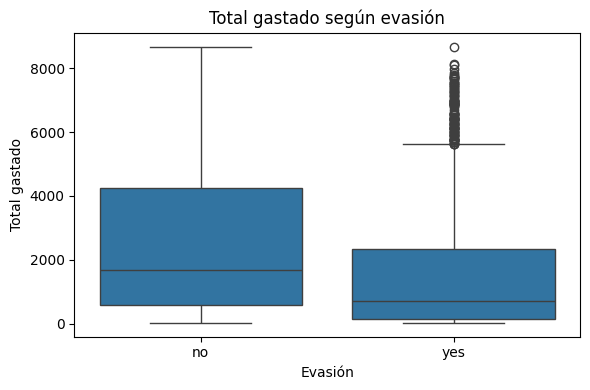

In [112]:
#Graficamos un grafico de cajas para saber que clientes suelen tener el gasto asociados a evasion temprana

plt.figure(figsize=(6,4))
sns.boxplot(
    data=customer_desertion,
    x='deserción',
    y='gastos_totales'
)
plt.title('Total gastado según evasión')
plt.ylabel('Total gastado')
plt.xlabel('Evasión')
plt.tight_layout()
plt.show()

##El gráfico de cajas arriba nos dice que la caja con la categoria NO su mediana en el gasto de los servicios que ofrece TeleconetX es mucho más alto que los que desidieron abandonar. Según el gráfico nos sugiere que las personas que desiden evadir (desertar) del servicio son aquellos que menor gasto han acumulado, mientras los que siguen con los servicios, son los que más acumulan los gastos por el servicio.

##En la caja de la categoria SI tenemos valores atípicos (outliers) representan clientes que gastaron igual o mas que los del NO, pero aún así decidieron irse. Posiblemente por instisfacción, cambios en los precios, problemas del servicio entre otras.

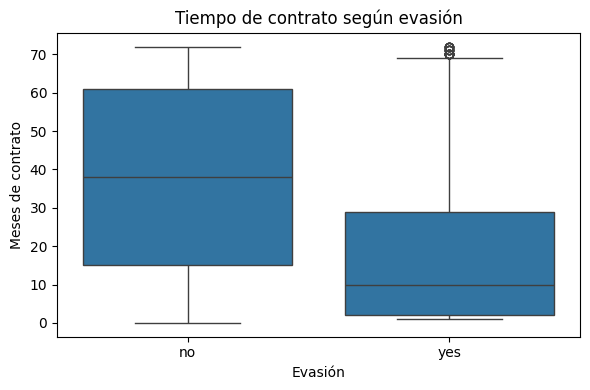

In [113]:
#Tiempo de contrato

plt.figure(figsize=(6,4))
sns.boxplot(
    data=customer_desertion,
    x='deserción',
    y='antiguedad_del_cliente' # Corrected column name
)
plt.title('Tiempo de contrato según evasión')
plt.ylabel('Meses de contrato')
plt.xlabel('Evasión')
plt.tight_layout()
plt.show()

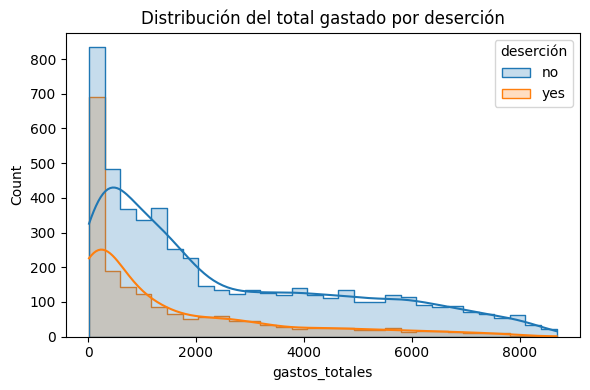

In [114]:
#Graficamos el total gastado

plt.figure(figsize=(6,4))
sns.histplot(
    data=customer_desertion,
    x='gastos_totales',
    hue='deserción', # Corrected column name
    bins=30,
    kde=True,
    element='step'
)
plt.title('Distribución del total gastado por deserción') # Updated title for consistency
plt.tight_layout()
plt.show()

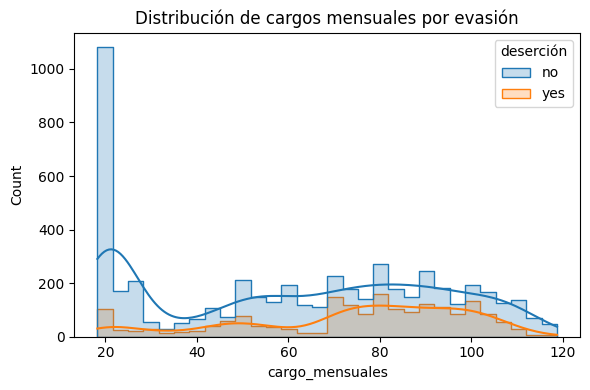

In [115]:
#Cargo mensuales

plt.figure(figsize=(6,4))
sns.histplot(
    data=customer_desertion,
    x='cargo_mensuales',
    hue='deserción',
    bins=30,
    kde=True,
    element='step'
)
plt.title('Distribución de cargos mensuales por evasión')
plt.tight_layout()
plt.show()

In [116]:
#Comparacion estadistica

# Filter cols_nums to include only numeric columns for mean and median aggregation
numeric_cols_for_agg = [col for col in cols_nums if customer_desertion[col].dtype in ['int64', 'float64']]

customer_desertion.groupby('deserción')[numeric_cols_for_agg].agg(['mean', 'median'])

cargo_mensuales         gastos_totales         
                     mean  median           mean   median
deserción                                                
no              61.265124  64.425    2555.344141  1683.60
yes             74.441332  79.650    1531.796094   703.55

#**ANÁLISIS DE CORRELACIÓN**


Esta actividad es un extra, por lo tanto es OPCIONAL.

Como un paso adicional, puedes explorar la correlación entre diferentes variables del dataset. Esto puede ayudar a identificar qué factores tienen mayor relación con la evasión de clientes, como:

🔹 La relación entre la cuenta diaria y la evasión.
🔹 Cómo la cantidad de servicios contratados afecta la probabilidad de 'churn'.

Puedes usar la función corr() de Pandas para calcular las correlaciones y visualizar los resultados con gráficos de dispersión o matrices de correlación.

Este análisis adicional puede proporcionar insights valiosos para la creación de modelos predictivos más robustos.

In [117]:
customer_desertion.columns

Index(['customer_id', 'deserción', 'genero', 'adulto_mayor', 'tiene_pareja',
       'tiene_dependientes', 'antiguedad_del_cliente', 'servicio_telefonico',
       'multiples_lineas', 'servicio_internet', 'seguridad_online',
       'respaldo_online', 'proteccion_dispositivos', 'soporte_tecnico',
       'streaming_tv', 'streaming_peliculas', 'contrato',
       'facturacion_electronica', 'metodo_pago', 'cargo_mensuales',
       'gastos_totales', 'cargo_diario', 'rango_antiguedad',
       'DailyCostSegment', 'cuentas_diarias'],
      dtype='object')

In [118]:
#Aplicaremos el método Point-Biserial
#Donde 'Y' es binaria (0, 1) y 'X' es númerica

from scipy.stats import pointbiserialr

¿Qué dide el Odd-Ration?
Cuántas veces cambia la probabilidad relativa de 'Churn' o 'Deserción' cuando la varible aumenta una unidad, manteniendo las demás constantes.

In [120]:
# First, ensure 'deserción' is numeric (0/1) for pointbiserialr
# Handle NA values by dropping them for correlation calculation
customer_desertion_temp = customer_desertion.dropna(subset=['deserción']).copy()
customer_desertion_temp['deserción_numeric'] = customer_desertion_temp['deserción'].map({'no': 0, 'yes': 1})

# 'num_cols' was previously defined and contains the numeric column names
numeric_variables_for_corr = [col for col in num_cols if col in customer_desertion_temp.columns]

resultados = []

for col in numeric_variables_for_corr:
  corr, p = pointbiserialr(customer_desertion_temp['deserción_numeric'], customer_desertion_temp[col])
  resultados.append((col, corr, p))

correlaciones_num = pd.DataFrame(
    resultados,
    columns=['Variable', 'Correlación', 'P-valor']
).sort_values(by='Correlación', key=abs, ascending=False)

In [122]:
from scipy.stats import chi2_contingency

# Define the list of categorical variables to analyze
# Exclude 'customer_id' and 'deserción' from the general categorical list for this chi-squared test
variables_categoricas = [col for col in customer_desertion.select_dtypes(include='object').columns
                         if col not in ['customer_id', 'deserción']]

chi_resultados = []

# Ensure 'deserción' column has no NA values for proper crosstab calculation
df_filtered = customer_desertion.dropna(subset=['deserción']).copy()

for col in variables_categoricas:
    tabla = pd.crosstab(df_filtered[col], df_filtered['deserción'])
    # Check if the table is not empty before running chi2_contingency
    if not tabla.empty and min(tabla.shape) > 1:
        chi2, p, dof, exp = chi2_contingency(tabla)
        chi_resultados.append([col, chi2, p])
    else:
        # Append NaN or a placeholder if chi-squared cannot be computed
        chi_resultados.append([col, None, None])

chi_df = pd.DataFrame(
    chi_resultados,
    columns=['Variable', 'Chi2', 'p_value']
).sort_values(by='Chi2', ascending=False)

In [125]:
from sklearn.linear_model import LogisticRegression

# Ensure customer_desertion_temp and deserción_numeric are available from previous cells
# If they are not, you might need to run the relevant cells first.
X = customer_desertion_temp[numeric_variables_for_corr]
y = customer_desertion_temp['deserción_numeric']

# Handle NaN values in X by dropping corresponding rows from X and y
# This ensures that X and y have consistent indices after dropping NaNs
valid_indices = X.dropna().index
X = X.loc[valid_indices]
y = y.loc[valid_indices]

modelo = LogisticRegression(max_iter=1000)
modelo.fit(X, y)

LogisticRegression(max_iter=1000)

In [127]:
import numpy as np

# Assuming 'modelo' is your fitted LogisticRegression model and 'X' is your feature DataFrame
coeficientes = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': modelo.coef_[0]
})

# Add the intercept
intercept_df = pd.DataFrame({
    'Variable': ['Intercepto'],
    'Coeficiente': modelo.intercept_[0]
})

coeficientes = pd.concat([intercept_df, coeficientes], ignore_index=True)

coeficientes['Odds_Ratio'] = np.exp(coeficientes['Coeficiente'])
coeficientes

,Variable,Coeficiente,Odds_Ratio
0,Intercepto,-1.582683,0.205423
1,adulto_mayor,0.625641,1.869444
2,antiguedad_del_cliente,-0.067584,0.934649
3,cargo_mensuales,0.028233,1.028635
4,gastos_totales,0.000150,1.000150
5,cargo_diario,0.000941,1.000942
6,cuentas_diarias,0.000031,1.000031


In [128]:
#Calculamos el resto de variables en el modelo LOGIT

# Columnas a excluir
excluir = [
    'customer_id',
    'deserción',
    'adulto_mayor',
    'antiguedad_del_cliente',
    'cargo_mensuales',
    'gastos_totales',
    'cargo_diario',
    'cuentas_diarias'
]

# Seleccionar TODAS las categóricas restantes
variables_categoricas = [
    col for col in customer_desertion.columns
    if customer_desertion[col].dtype == 'object'
    and col not in excluir
]

variables_categoricas

['genero',
 'tiene_pareja',
 'tiene_dependientes',
 'servicio_telefonico',
 'multiples_lineas',
 'servicio_internet',
 'seguridad_online',
 'respaldo_online',
 'proteccion_dispositivos',
 'soporte_tecnico',
 'streaming_tv',
 'streaming_peliculas',
 'contrato',
 'facturacion_electronica',
 'metodo_pago']

In [129]:
# Variable dependiente
y = customer_desertion['deserción'].map({'no': 0, 'yes': 1})

# Dataset categórico
X_cat = customer_desertion[variables_categoricas]

# One-Hot Encoding (evita trampa de las dummies)
X_cat_dummies = pd.get_dummies(X_cat, drop_first=True)

# Unir y limpiar
data_logit_cat = pd.concat([X_cat_dummies, y], axis=1).dropna()

X_final = data_logit_cat.drop(columns='deserción')
y_final = data_logit_cat['deserción']


In [130]:
from sklearn.linear_model import LogisticRegression

modelo_logit_cat = LogisticRegression(
    max_iter=1000,
    solver='lbfgs'
)

modelo_logit_cat.fit(X_final, y_final)

LogisticRegression(max_iter=1000)

In [132]:
resultados_logit_cat = pd.DataFrame({
    'Variable': X_final.columns,
    'Coeficiente': modelo_logit_cat.coef_[0],
})

resultados_logit_cat['Odds_Ratio'] = np.exp(resultados_logit_cat['Coeficiente'])

resultados_logit_cat = resultados_logit_cat.sort_values(
    by='Odds_Ratio',
    key=abs,
    ascending=False
)

resultados_logit_cat


,Variable,Coeficiente,Odds_Ratio
6,servicio_internet_fiber optic,0.798170,2.221473
24,metodo_pago_electronic check,0.477778,1.612488
22,facturacion_electronica_yes,0.310550,1.364175
25,metodo_pago_mailed check,0.226844,1.254634
17,streaming_tv_yes,0.165762,1.180292
19,streaming_peliculas_yes,0.164910,1.179287
5,multiples_lineas_yes,0.011047,1.011108
0,genero_male,-0.045085,0.955916
4,multiples_lineas_no phone service,-0.057695,0.943938
23,metodo_pago_credit card (automatic),-0.083594,0.919804


De la tabla anterior podemos inferir que, los adultos mayores tienen un 87% más riesgo de desertar. Mientras que la 'antiguendad_cliente' se reduce 6.7% a medida que aumenta la antiguedad. Vemos que las variables numéricas como 'cargo_mensual'; 'gastos_totales';'cargo_diario' y 'cuentas_diarias' que potencialmente podrían ser un factor director en la deserción. De acuerdo con el modelo no tienen un impacto relevante en la deserción.

#**INFORME FINAL**

#Introducción
##La empresa TelcomX enfrenta una alta tasa de cancelaciones o tambien de desafiliaciones de los servivicios que la empresa brinda.

##Procedimiento:
Los datos fueron importados desde el repositorio de GitHub. Se utilizó Python para manipular y visulizar los datos Se usaron librerias como **pandas**, **matplotlib**, entre otras. El archivo de lectura estaba anidado en un formato json. Se realizón las transformaciones pertinentes con 'normalize' para dar lectura y crear los análisis correspondientes como:
*   Estado de deserción del cliente
*   Antiguedad del cliente
*   Género
*   Gastos totales y mensuales

##Limpieza de datos
Una vez importado los datos se procedió a la depuración de la información, con la finalidad de entender los datos y que sean consistentes para la lectura. Las actividades que se realizarón fueron:
*   Revisión de valores nulos o faltantes
*   Corrección y estandarización de las catogorías
*   Conversión de tipos de datos, se detectaron que existen varias columnas de tipo 'object' o de cadena. Las cuales se ejecutaron una estadarización de sus nombres en todo el dataframe. La columnas numéricas se transformaron en 'int64' para su mejor comprensión.
*   Validación de rangos, se verificó que la antiguedad del cliente contenfa valores válidos y coherentes.

##Transformación
Con los datos depurados y estadarizados se realizaron diversas transformaciones para generar variables e indicadores que puedan facilitar el análisis exploratorio de datos. Por ejemplo,
*   Cálculo de deserción, mediante conteos de los números de clientes que desertaron
*   Agrupación de datos utilizando 'groupby' lo que permitió analizar la deserción según: antiguedad del cliente; genero; rangos temporales.
*   Creación de variables derivadas como la tasa de deserción expresada en porcentajes.
*   Ordenamiento y segmentacion de los resultados.

##Visulización
Finalmente, los datos procesados fueron preparados para la gráfica utilizando Matplotlib, Seaborn y Plotly, lo que permitió:

*   Construir gráficos de barras simples y apiladas.

*   Analizar la distribución de la deserción por género y por antigüedad.

*   Mejorar la interpretación visual mediante etiquetas, títulos y escalas adecuadas.

*   Incorporar interactividad en los gráficos para una exploración más dinámica de los resultados.

#Principales Hallazgos
La deserción no se distribuye de manera uniforme. El análisis demuestra que la deserción no ocurre de forma aleatoria, sino que concentra en determinados segmentos. Existen grupos específicos de clientes que presentan una mayor propensión a desertar, lo que indica que se debe aplicar estrategías claras para los nuevos clientes.

La antiguedad del cliente es un factor determinante, ya que nos permitió sabe los grupos de evasión en el que se concentran. Esto sugiere que existen momentos críticos en el cliente evalúa continuar o abandonar el servicio.

El porcencenta de deserción por genero actua como los censo poblacionales. Es decir, existe un 51 de evasiones que corresponden al genero femenino y un 49% de evasores del genero masculino.

El uso de gráficos dinámicos pemritió identificar de forma clara los segmentos con mayor volumen de clientes desertores, facilitando la toma de decisiones basada en datos y la comunicación de resultados a niveles directivos.

#Conclusiones
La deserción es un fenómeno multifactorial, influenciado principalmente por la antiguedad del cliente y características demográficas. Existen segementos con alto riesgo claramente identificable, lo que permite pasar una gestión preventiva de la deserción. El análisis de datos y su correcta visualización constituye una herramienta clave para anticipar la evasión y reducir su impacto en la organización.


#Recomendaciones

Estrategias de retención por etapa del cliente que permita implementar programas diferenciados según la antigüedad del cliente, reforzando la comunicación, acompañamiento y beneficios en los períodos donde se detecta mayor riesgo de deserción.

Segmentación de clientes para  focalizadar y diseñar campañas de fidelización específicas considerando variables como género y antigüedad, evitando estrategias genéricas que suelen ser menos efectivas.

Sistemas de alerta temprana es decir, indicadores de riesgo de deserción que permitan identificar clientes vulnerables y activar acciones preventivas (contacto proactivo, ofertas personalizadas, soporte adicional).